###	Data Preprocessing

In [1]:
#Import the Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset.
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
#Checking for Null Values.
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8660\2400079689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

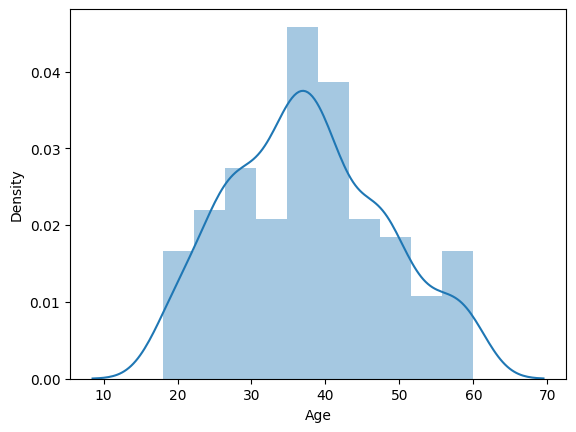

In [10]:
#Data Visualization.
sns.distplot(df["Age"])

In [11]:
df.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8660\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8660\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

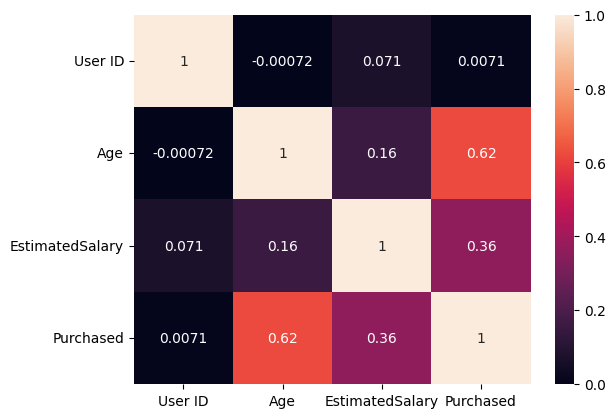

In [13]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='EstimatedSalary'>

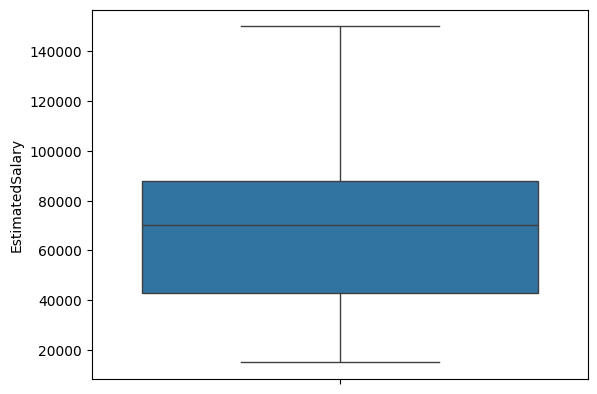

In [14]:
sns.boxplot(df.EstimatedSalary)
#sns.boxplot(df["EstimatedSalary"])

<Axes: ylabel='Age'>

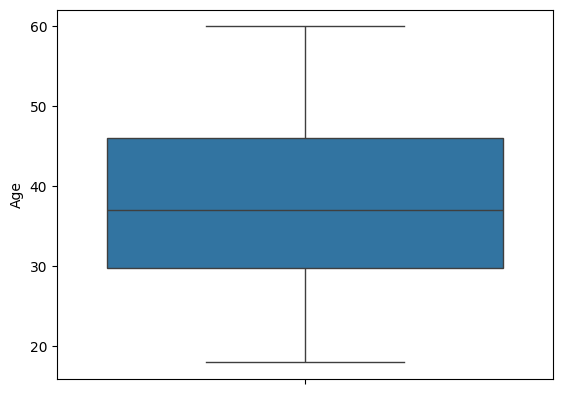

In [15]:
sns.boxplot(df.Age)

In [16]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
#Splitting Dependent and Independent variables
x=df.iloc[:,1:4]
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [18]:
y=df.Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [19]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.Gender=le.fit_transform(x.Gender)
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [20]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [21]:
x_scaled


,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852
...,...,...,...
395,0.0,0.666667,0.192593
396,1.0,0.785714,0.059259
397,0.0,0.761905,0.037037
398,1.0,0.428571,0.133333


In [22]:
#Splitting Data into Train and Test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [24]:
x_train.head()

,Gender,Age,EstimatedSalary
336,1.0,0.952381,0.955556
64,0.0,0.976190,0.503704
55,0.0,0.142857,0.296296
106,0.0,0.190476,0.148148
300,0.0,0.952381,0.170370


### Model Building


In [25]:
from sklearn.svm import SVC
model=SVC(probability=True)

In [26]:
rand_list={"C":[2,3,5,6,7,8,10],
           "gamma":[0.1,0.2,0.5,0.4,0.8]}

In [27]:
from sklearn.model_selection import RandomizedSearchCV
rand_search=RandomizedSearchCV(model,param_distributions=rand_list,n_iter=20,cv=5)

In [28]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_iter=20,
                   param_distributions={'C': [2, 3, 5, 6, 7, 8, 10],
                                        'gamma': [0.1, 0.2, 0.5, 0.4, 0.8]})

In [29]:
pred=rand_search.predict(x_test)

In [30]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [32]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [33]:
rand_search.predict(ms.transform([[1,19,19000]]))

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Evaluation of classification model

In [34]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [35]:
accuracy_score(y_test,pred)

0.95

In [36]:
confusion_matrix(y_test,pred)

array([[56,  2],
       [ 2, 20]], dtype=int64)

In [37]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,56,2
1,2,20


In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



### Roc-AUC curve

In [42]:
probability=rand_search.predict_proba(x_test)[:,1]

In [43]:
probability

array([0.09289884, 0.086927  , 0.07510683, 0.04478276, 0.04897278,
       0.01111215, 0.07990496, 0.99554607, 0.02589376, 0.66231724,
       0.01094037, 0.01808177, 0.05659512, 0.18718223, 0.06494659,
       0.5       , 0.12464905, 0.06174439, 0.97422692, 0.05992279,
       0.0509695 , 0.9740563 , 0.16644358, 0.9328746 , 0.01812369,
       0.97296837, 0.06100399, 0.04759576, 0.06792324, 0.07381086,
       0.07664243, 0.14012036, 0.98666737, 0.05507207, 0.00768375,
       0.0063433 , 0.03902322, 0.04521284, 0.03402381, 0.8002034 ,
       0.08189302, 0.15937638, 0.05078731, 0.06360006, 0.65940685,
       0.01745069, 0.10185412, 0.81336547, 0.00678386, 0.87285112,
       0.97272739, 0.08236306, 0.0475476 , 0.80457524, 0.96213803,
       0.56470619, 0.05214421, 0.03881365, 0.8912326 , 0.00707281,
       0.03347888, 0.9973449 , 0.0273697 , 0.44464863, 0.01838665,
       0.99520989, 0.06661569, 0.00946032, 0.12114292, 0.19570463,
       0.97089213, 0.06817665, 0.01756544, 0.686117  , 0.09023

In [44]:
# roc_curve
fpr,tpr,threshsholds = roc_curve(y_test,probability)

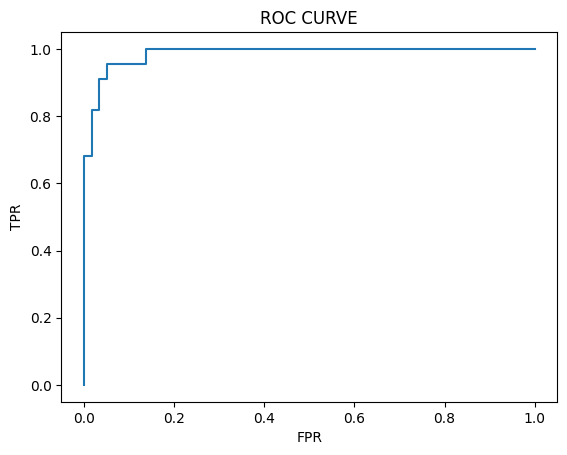

In [45]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()